In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Sales Prediction (Simple Linear Regression).csv')

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [5]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [10]:
df.shape

(200, 4)

In [11]:
#Data Cleaning

df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [12]:
#Now checking for the outliers

#Using Z_score

from scipy import stats

z_scores = stats.zscore(df['Newspaper'])

z_score_threshold = 3

outliers = df['Newspaper'][abs(z_scores) > z_score_threshold]

print(outliers)

16     114.0
101    100.9
Name: Newspaper, dtype: float64


In [13]:
z_scores = stats.zscore(df['Radio'])

z_score_threshold = 2

outliers = df['Radio'][abs(z_scores) > z_score_threshold]

print(outliers)

Series([], Name: Radio, dtype: float64)


In [14]:
z_scores = stats.zscore(df['TV'])

z_score_threshold = 2

outliers = df['TV'][abs(z_scores) > z_score_threshold]

print(outliers)

Series([], Name: TV, dtype: float64)


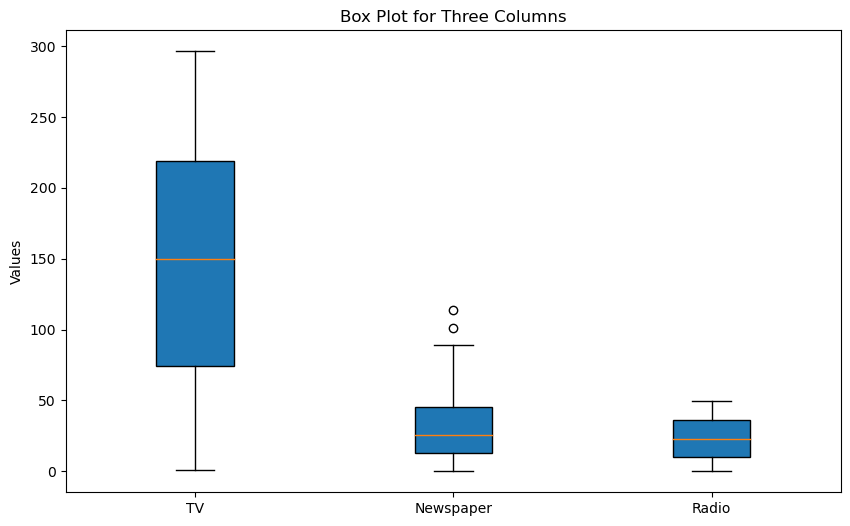

In [15]:
#Using boxplot

plt.figure(figsize=(10, 6))
plt.boxplot([df['TV'], df['Newspaper'], df['Radio']], labels=['TV', 'Newspaper', 'Radio'] , patch_artist=True)
plt.title('Box Plot for Three Columns')
plt.ylabel('Values')
plt.show()

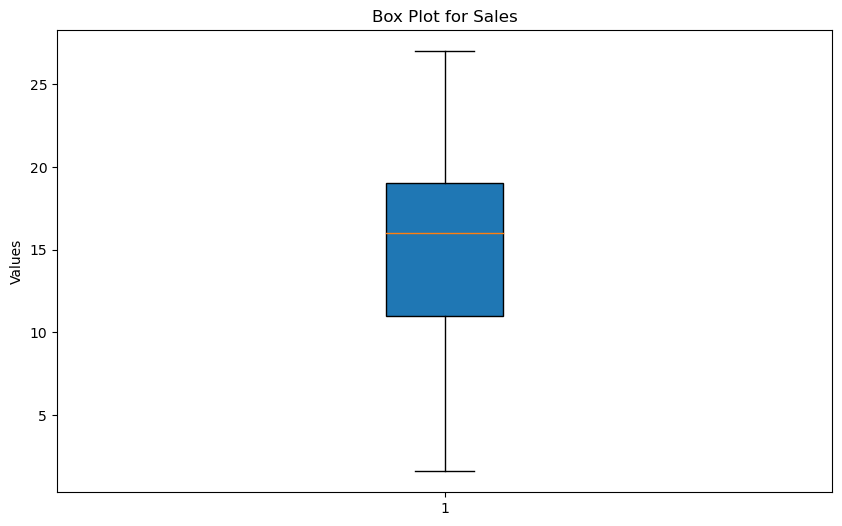

In [16]:
#Explanatory Data Analysis

plt.figure(figsize=(10, 6))
plt.boxplot(df['Sales'] , patch_artist=True)
plt.title('Box Plot for Sales')
plt.ylabel('Values')
plt.show()

C:\Users\adris\AppData\Local\Temp\ipykernel_12048\2738852783.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='TV', y='Sales', palette='viridis')


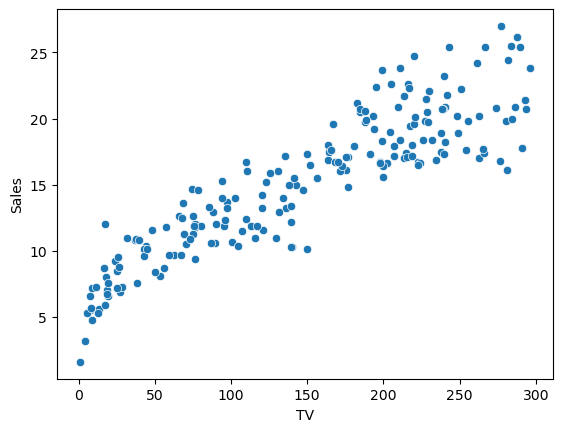

In [17]:
sns.scatterplot(data=df, x='TV', y='Sales', palette='viridis')
plt.show()

C:\Users\adris\AppData\Local\Temp\ipykernel_12048\3829962842.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Radio', y='Sales', palette='viridis')


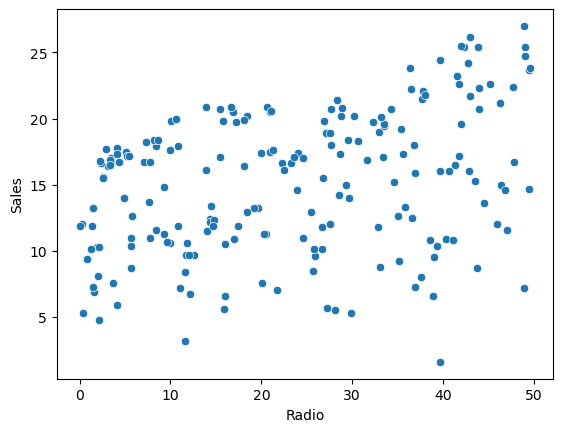

In [18]:
sns.scatterplot(data=df, x='Radio', y='Sales', palette='viridis')
plt.show()

C:\Users\adris\AppData\Local\Temp\ipykernel_12048\3467962322.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Newspaper', y='Sales', palette='viridis')


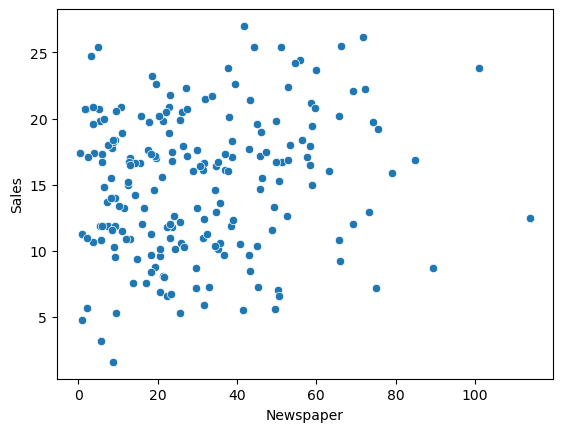

In [19]:
sns.scatterplot(data=df, x='Newspaper', y='Sales', palette='viridis')
plt.show()

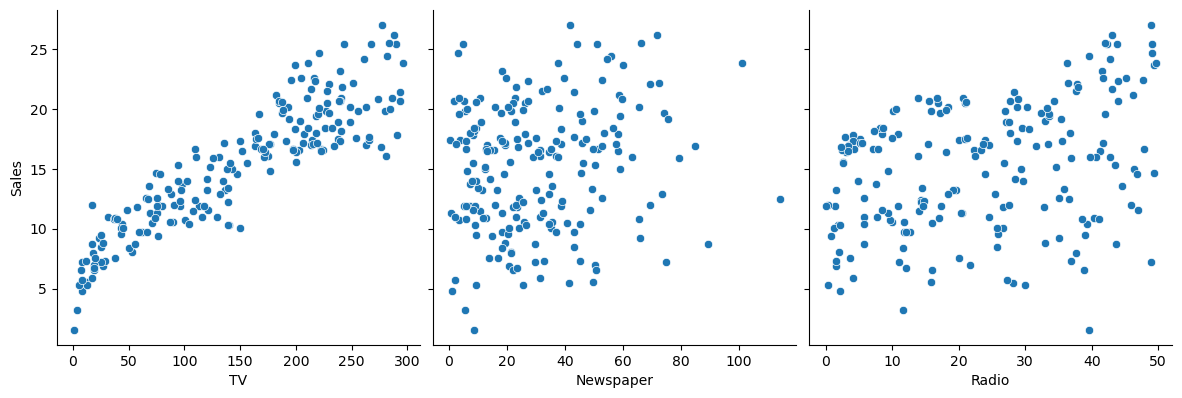

In [20]:
sns.pairplot(data= df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [21]:
correlation_matrix = df.corr()
correlation_matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


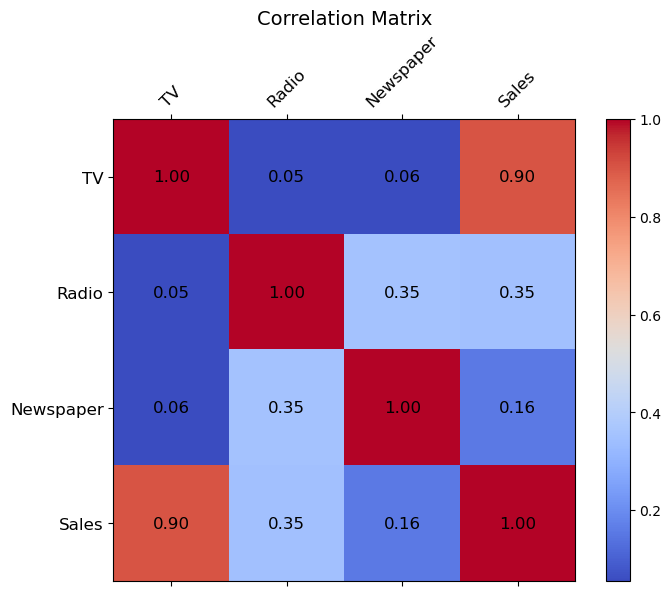

In [22]:
correlation_matrix = df.corr()

# Create a table of correlation values

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(correlation_matrix, cmap='coolwarm')
plt.colorbar(cax)

# Add labels to the table cells

for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black', fontsize=12)

# Customize axis labels and title
ax.set_xticks(range(len(df.columns)))
ax.set_yticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, rotation=45, fontsize=12)
ax.set_yticklabels(df.columns, fontsize=12)
ax.set_title('Correlation Matrix', fontsize=14)

plt.show()

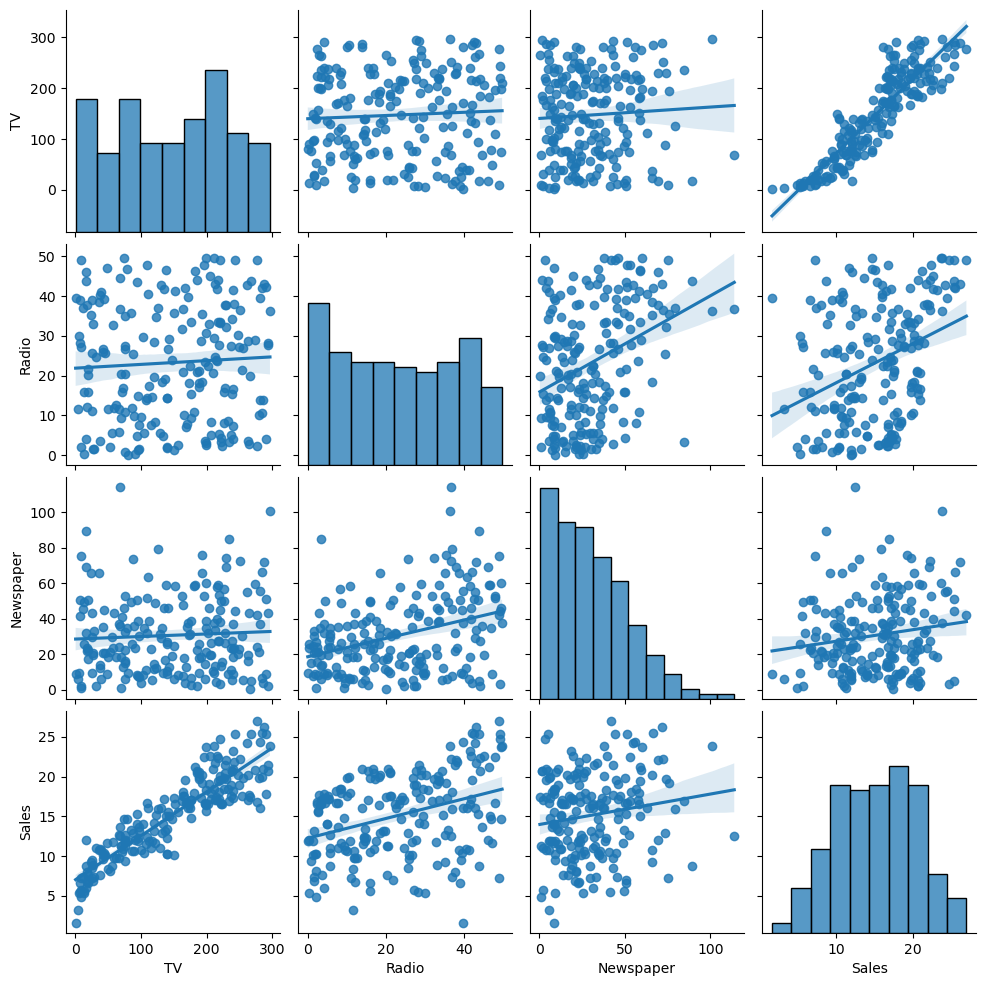

In [23]:
sns.pairplot(df, kind='reg')
plt.show()

In [24]:
#INTO THE REALM OF SIMPLE REGRESSION MODEL

#Since it is evident that Sales have the highest correlation with TV and the responsiveness is also high in this case. Hence we should we TV as the Explanatory Variable in this Simple Regression Model.

X = df['TV']
Y= df['Sales']

In [25]:
X

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [26]:
Y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 44)

In [28]:
import statsmodels.api as sm

In [29]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(Y_train, X_train_sm).fit()

In [30]:
lr.params

const    6.591946
TV       0.058408
dtype: float64

In [31]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     732.3
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           3.57e-59
Time:                        17:45:12   Log-Likelihood:                -338.41
No. Observations:                 150   AIC:                             680.8
Df Residuals:                     148   BIC:                             686.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5919      0.365     18.061      0.0

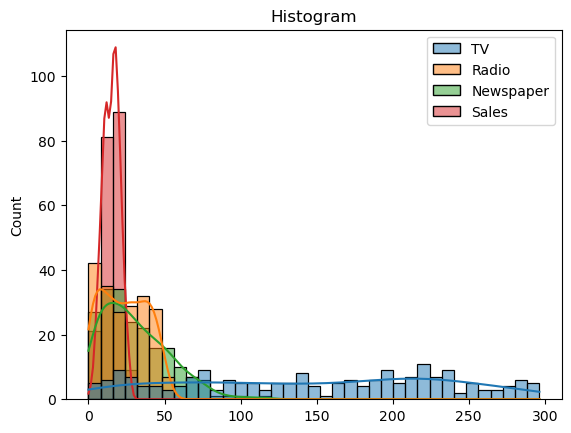

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df, kde=True) 
plt.title('Histogram')
plt.show()

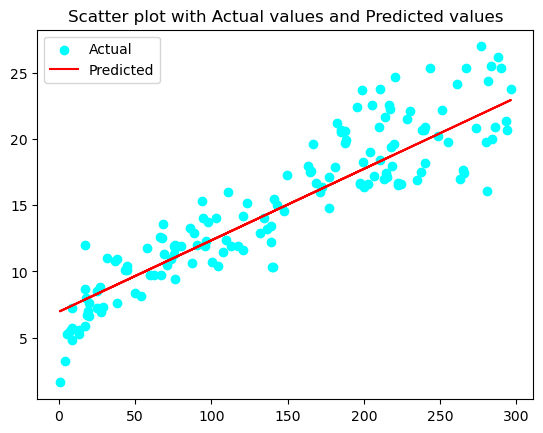

In [33]:
predicted_values = 6.948 + 0.054 * X_train

plt.scatter(X_train, Y_train, label='Actual', color='cyan')
plt.plot(X_train, predicted_values, label='Predicted', color='red')

plt.legend()
plt.title("Scatter plot with Actual values and Predicted values")
plt.show()


In [34]:
Y_train_pred = lr.predict(X_train_sm)
residuals = (Y_train - Y_train_pred)

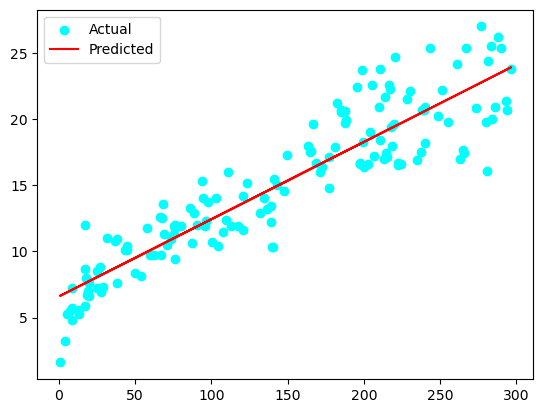

In [35]:
predicted_values = 6.948 + 0.054 * X_train

plt.scatter(X_train, Y_train, label='Actual', color='cyan')
plt.plot(X_train, Y_train_pred, label='Predicted', color='red')

plt.legend()
plt.show()

C:\Users\adris\AppData\Local\Temp\ipykernel_12048\3546971672.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins = 15)


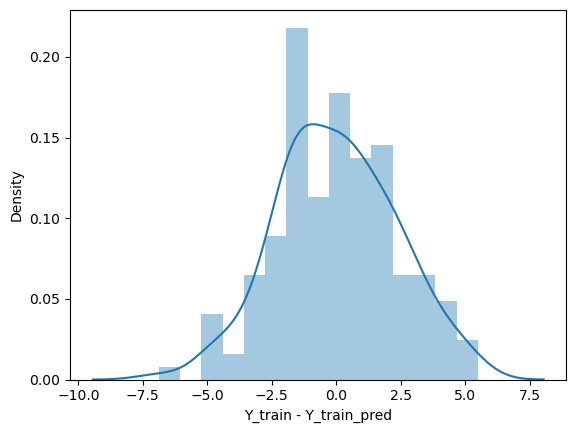

In [36]:
sns.distplot(residuals, bins = 15)
fig.suptitle('Residuals')                  
plt.xlabel('Y_train - Y_train_pred')         
plt.show()

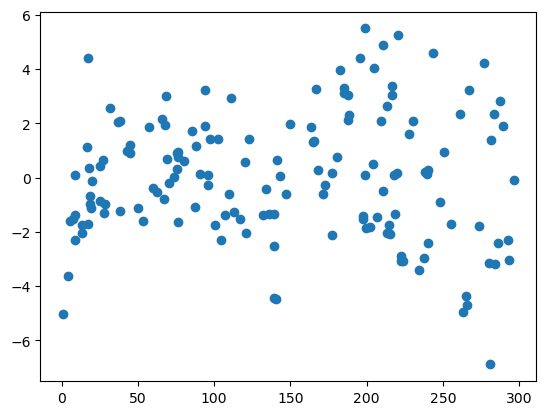

In [37]:
plt.scatter(X_train, residuals)
plt.show()

In [38]:
X_test_sm = sm.add_constant(X_test)

Y_test_pred = lr.predict(X_test_sm)

In [39]:
Y_test_pred

135     9.413074
73     14.149999
157    15.341532
28     21.123969
23     19.926595
79     13.367326
54     21.935846
3      15.440826
114    11.159487
124    19.996686
180    15.738709
111    20.709269
182     9.874501
64     14.249294
9      18.261955
68     20.458112
35     23.571283
45     16.819266
89     13.005194
47     20.604134
177    16.533064
126     7.047531
142    19.471010
7      13.612642
12      7.982067
32     12.269247
181    19.354193
136     8.087202
105    14.646471
178    22.753565
48     19.862346
190     8.899079
112    16.854311
81     20.598293
95     16.130046
43     18.676655
158     7.275324
187    17.753801
99     14.488768
65     10.622129
138     9.103509
46     11.831184
118    13.933888
85     17.876459
110    19.780574
141    17.905663
199    20.148548
115    10.978420
37     10.955057
184    21.416011
dtype: float64

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(mean_squared_error(Y_test, Y_test_pred))

5.130781018927401


In [41]:
r_squared = r2_score(Y_test, Y_test_pred)
r_squared

0.6752588028223878

In [42]:
test_residuals= Y_test-Y_test_pred
test_residuals

135    2.186926
73    -3.149999
157   -5.241532
28    -2.223969
23     0.573405
79    -2.367326
54    -1.735846
3      1.059174
114    3.440513
124   -0.296686
180   -0.238709
111    1.090731
182   -1.174501
64     1.750706
9     -2.661955
68    -1.558112
35    -5.771283
45    -0.719266
89     3.694806
47     2.595866
177    0.166936
126   -0.447531
142    0.628990
7     -0.412642
12     1.217933
32     0.930753
181   -2.154193
136    1.412798
105    0.353529
178   -5.953565
48    -0.062346
190    1.900921
112    0.245689
81    -3.298293
95     0.769954
43    -0.776655
158    0.024676
187   -0.453801
99     2.711232
65     0.677871
138    0.496491
46    -1.231184
118    1.966112
85     2.323541
110   -1.380574
141    1.294337
199   -1.748548
115    1.621580
37     3.744943
184   -3.816011
dtype: float64

C:\Users\adris\AppData\Local\Temp\ipykernel_12048\2103032771.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_residuals, bins = 15)


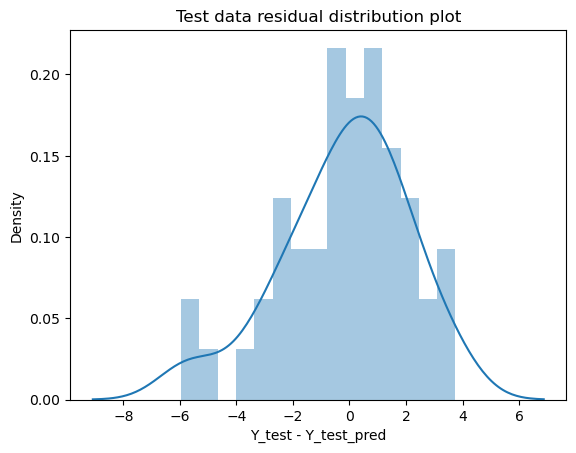

In [43]:
#Visualization of the Test Data

sns.distplot(test_residuals, bins = 15)
fig.suptitle('Residuals')                  
plt.xlabel('Y_test - Y_test_pred')   
plt.title('Test data residual distribution plot')
plt.show()

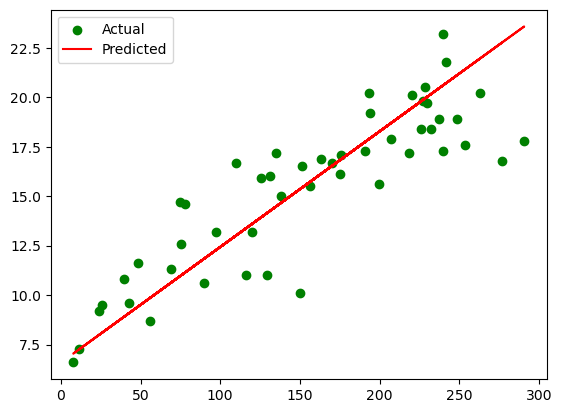

In [44]:
plt.scatter(X_test, Y_test, label='Actual', color='green')
plt.plot(X_test, Y_test_pred, label='Predicted', color='red')

plt.legend()
plt.show()